In [1]:
from sklearn.neighbors import KNeighborsRegressor

### KNN -> K-최근접 이웃 회귀 (K-Nearest Neighbors)

- 거리기반으로 진행한다.
- 거리 기반에서 가장 가까운 k개 이웃을 찾고 -> 1,3,5 K개의 정답의 평균을 계산해서 예측
- 영화 평점데이터를 예시로 생각하면
- 영화가 3개가 있다. 평점 5.0 , 7.0, 9.5 의 등급을 가졌다.
- k= 3으로 했을 때 3개의 평균을 계산하면 된다 -> 정답


- 단순하게 거리기반으로만 데이터를 나누고 평균을 계산하면 문제가 발생할 수 있다.
- 3개라 했는데 영화 3개가 다 같은 거리는 아니다. k=3 3을 잡은 것 뿐이지 3개가 거리가 같지는 않다.
- 평균으로 잡게되면 예측 정확도가 떨어질 수 있고 -> 가중치를 잡아서 평점을 예측한다.
- 가중평균을 이용해서 거리가 가까울수록 더 데이터가 유사할 것이라고 보고 가중치 부여하는 것 

- ex)
- A 영화 5.0 / 새로운 값까지 거리가 3.2
- B 영화 7.0 / 새로운 값까지 거리가 10.5
- C 영화 9.5 / 새로운 값까지 거리가 1.1

- 단순하게 평균을 계산하면 7.12 나왔지만

In [2]:
# 새로운 데이터 값의 3개의 기준의 평점이 아래와 같으면 아래의 평균으로 대체한다. 
(5.0+7.0+9.5)/3

7.166666666666667

In [4]:
#가중평균 개념으로 하면 오히려 1.1에 까가운 평점 9.5 영향을 받아서 해당 x값은 더 높게 나온다.
(5.0/3.2+7.0/10.5+9.5/1.1) / (1/3.2+1/10.5+1/1.1)

8.25128415861927

### KNN의 한계 
- 거리기반이다보니 기존에 학습할 데이터에서 벗어난 범위들은 정확하게 예측하기 어렵다. 

In [6]:
import numpy as np
x1 = np.arange(1,11)
x = x1.reshape(-1,1)
y = np.arange(1,11)*5

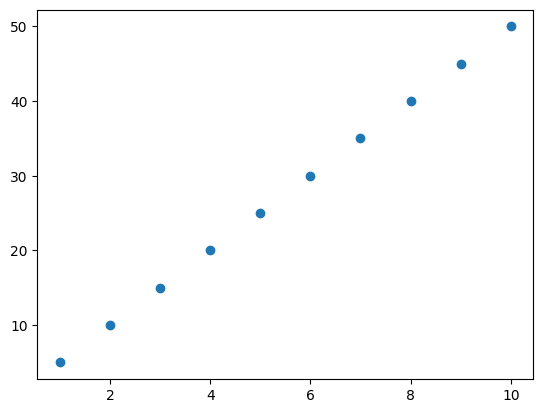

In [9]:
import matplotlib.pyplot as plt
plt.figure()
plt.scatter(x,y)
plt.show()

In [10]:
knn_re =KNeighborsRegressor(n_neighbors = 2).fit(x,y)

In [12]:
print(knn_re.predict([[7]]))

[32.5]


In [13]:
knn_re

KNeighborsRegressor(n_neighbors=2)

- knn의 한계

In [14]:
print(knn_re.predict([[10]]))

[47.5]


In [15]:
print(knn_re.predict([[15]]))

[47.5]


In [16]:
print(knn_re.predict([[20]]))

[47.5]


In [17]:
print(knn_re.predict([[100]]))

[47.5]


### KNN - 파라미터들 정리하기!
- n_neighbors = 이웃의 개수
- weight 가중평균 개념 uniform, distance 거리기반의 가중치를 둘 것인가 아닌가 - uniform 디폴트
- algorithm - ball_tree, kd_tree, brute (거리 기반이고 차원이 많아지면 데이터를 탐색하는 시간이 오래 걸린다.) 해당 데이터를 탐색하는 방법에 대해서 어떤 식으로 할 것인가? ( left_size 트리구조로 데이터를 찾아보니 -> 최소한 몇 개의 가지치기 개념으로 찾을 것인가 ) 
- 연산에 대한 기준을 나눠서 효율적으로 탐색하기 위한 방법
- metrics  디폴트 = 민코프스키 유클리디안거리니깐 p =2 , 
- 민코프스키거리 -  p = 1 맨하탄, p=2 유클리디안, p =3 체비쇼프 거리 기반으로 
- n_jobs - 사용할 cpu 개수 -1 디폴트 넣고 

- 거리기반이다보니 가중평균이 중요하다는 것을 말씀드렸고 이 부분이 시각적으로 잘 표현된 코드가 있다.

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import neighbors

np.random.seed(0)
X = np.sort(5 * np.random.rand(40, 1), axis=0)
T = np.linspace(0, 5, 500)[:, np.newaxis]
y = np.sin(X).ravel()

# Add noise to targets
y[::5] += 1 * (0.5 - np.random.rand(8))

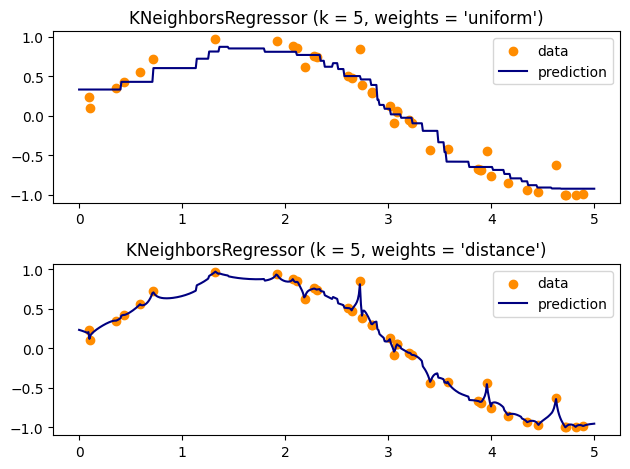

In [20]:
n_neighbors = 5

for i, weights in enumerate(["uniform", "distance"]):
    knn = neighbors.KNeighborsRegressor(n_neighbors, weights=weights)
    y_ = knn.fit(X, y).predict(T)

    plt.subplot(2, 1, i + 1)
    plt.scatter(X, y, color="darkorange", label="data")
    plt.plot(T, y_, color="navy", label="prediction")
    plt.axis("tight")
    plt.legend()
    plt.title("KNeighborsRegressor (k = %i, weights = '%s')" % (n_neighbors, weights))

plt.tight_layout()
plt.show()

### 캘리포니아 집값 데이터로 KNN-이웃회귀 진행해 보자!

In [27]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.model_selection import train_test_split
dataset = datasets.fetch_california_housing()
df = pd.DataFrame(dataset.data, columns=dataset.feature_names)
df['target'] = dataset.target
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [28]:
data = df[['MedInc','HouseAge']]
target = df['target']

In [29]:
x_train, x_test, y_train, y_test = train_test_split(data, target, test_size=0.3, random_state=111)

In [31]:
from sklearn import neighbors 

### n 을 조절해 보면서 어떤식으로 변화하는 체크해 보자!

In [37]:
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [48]:
rmse_val = []
for K in range(150):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)
    model.fit(x_train, y_train)
    pred = model.predict(x_test)
    error = sqrt(mean_squared_error(y_test, pred))
    rmse_val.append(error)
    print('Rmse ',K,'=',error)
print(min(rmse_val))

Rmse  1 = 1.0959311880303921
Rmse  2 = 0.9475129957997873
Rmse  3 = 0.8874965965579422
Rmse  4 = 0.8638927087946467
Rmse  5 = 0.8435805606254462
Rmse  6 = 0.8368660220570638
Rmse  7 = 0.828524749748181
Rmse  8 = 0.823152095839351
Rmse  9 = 0.8200094939644422
Rmse  10 = 0.8179826274135966
Rmse  11 = 0.8165455966668905
Rmse  12 = 0.813507522785317
Rmse  13 = 0.8119582732276533
Rmse  14 = 0.8092069646962123
Rmse  15 = 0.80897107235346
Rmse  16 = 0.8061676802129464
Rmse  17 = 0.805028219982111
Rmse  18 = 0.8031504827404409
Rmse  19 = 0.8021295586391808
Rmse  20 = 0.8010114409583255
Rmse  21 = 0.8008901582095421
Rmse  22 = 0.8001235355333389
Rmse  23 = 0.7998128965624693
Rmse  24 = 0.7992810931946458
Rmse  25 = 0.798804237299439
Rmse  26 = 0.798346894894349
Rmse  27 = 0.7966685652090113
Rmse  28 = 0.7966829589477498
Rmse  29 = 0.7962788723103374
Rmse  30 = 0.7961587320463572
Rmse  31 = 0.7953212706640512
Rmse  32 = 0.7951576672372942
Rmse  33 = 0.7947609225242169
Rmse  34 = 0.79446344008667

- 이웃을 150개 이상잡고 숫자가 계속 커지면 -> 평균으로 회귀하는 것 평균에 대해서 결국 값을 대체하게 되는 것이니 전체 평균으로 점점 가지고 가게 되는 것

<Axes: >

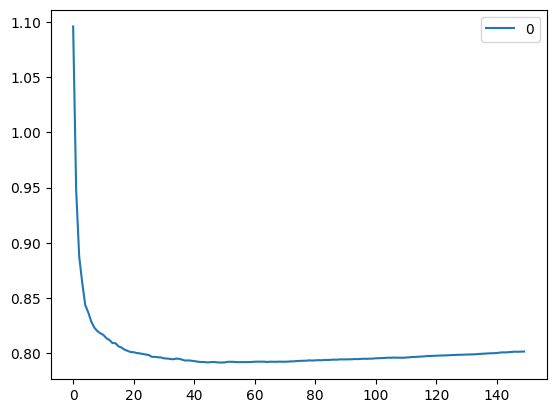

In [43]:
curve1 = pd.DataFrame(rmse_val)
curve1.plot()

In [44]:
rmse_val = []
for K in range(150):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K, weights ='distance')
    model.fit(x_train, y_train)
    pred = model.predict(x_test)
    error = sqrt(mean_squared_error(y_test, pred))
    rmse_val.append(error)
    print('Rmse ',K,'=',error)

Rmse  1 = 1.0959311880303921
Rmse  2 = 0.9898627352927131
Rmse  3 = 0.9480614287043372
Rmse  4 = 0.9292553833713344
Rmse  5 = 0.9152799916475833
Rmse  6 = 0.9073112168522246
Rmse  7 = 0.9000019198861765
Rmse  8 = 0.8951641921788168
Rmse  9 = 0.8917761730534691
Rmse  10 = 0.8886663145472018
Rmse  11 = 0.8859289328793432
Rmse  12 = 0.8833026816587765
Rmse  13 = 0.8813643826642595
Rmse  14 = 0.8791372616774631
Rmse  15 = 0.8777947557846131
Rmse  16 = 0.8758294146889891
Rmse  17 = 0.8743937603112951
Rmse  18 = 0.8730151367340743
Rmse  19 = 0.8718719277455077
Rmse  20 = 0.8708639730084943
Rmse  21 = 0.8700793244163494
Rmse  22 = 0.8691397535911949
Rmse  23 = 0.8684008621232877
Rmse  24 = 0.8676655782872276
Rmse  25 = 0.8668392967717065
Rmse  26 = 0.8661056537963298
Rmse  27 = 0.8650843600458642
Rmse  28 = 0.8645607422188962
Rmse  29 = 0.8638823864386243
Rmse  30 = 0.8632693133328503
Rmse  31 = 0.8626549875727465
Rmse  32 = 0.8621203629152574
Rmse  33 = 0.8615681322002836
Rmse  34 = 0.861093

<Axes: >

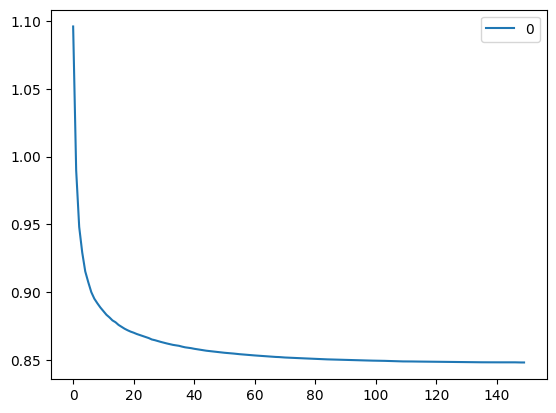

In [45]:
curve2 = pd.DataFrame(rmse_val)
curve2.plot()

In [46]:
rmse_val = []
for K in range(150):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K, weights ='distance',p=1)
    model.fit(x_train, y_train)
    pred = model.predict(x_test)
    error = sqrt(mean_squared_error(y_test, pred))
    rmse_val.append(error)
    print('Rmse ',K,'=',error)

Rmse  1 = 1.0973288608094176
Rmse  2 = 0.9898574827471288
Rmse  3 = 0.948122199739295
Rmse  4 = 0.9293854464355026
Rmse  5 = 0.9152072260439638
Rmse  6 = 0.9073320854083968
Rmse  7 = 0.9001919816563825
Rmse  8 = 0.895276225694405
Rmse  9 = 0.8918600043198135
Rmse  10 = 0.8887451158020313
Rmse  11 = 0.886046087851763
Rmse  12 = 0.8835002082344019
Rmse  13 = 0.8815333468424021
Rmse  14 = 0.8792692828811379
Rmse  15 = 0.8778928461554355
Rmse  16 = 0.8760229429446978
Rmse  17 = 0.874582365243628
Rmse  18 = 0.8732562127145398
Rmse  19 = 0.8720446752658443
Rmse  20 = 0.8710485533053702
Rmse  21 = 0.8703322769827982
Rmse  22 = 0.8693093656951474
Rmse  23 = 0.8685895074032267
Rmse  24 = 0.8678613553100193
Rmse  25 = 0.8670452582846183
Rmse  26 = 0.8663784528905241
Rmse  27 = 0.865298054072614
Rmse  28 = 0.8647945407326232
Rmse  29 = 0.8641299078982406
Rmse  30 = 0.8636705781150044
Rmse  31 = 0.8630848215753882
Rmse  32 = 0.8625187609301448
Rmse  33 = 0.8619975046130149
Rmse  34 = 0.86155462071

<Axes: >

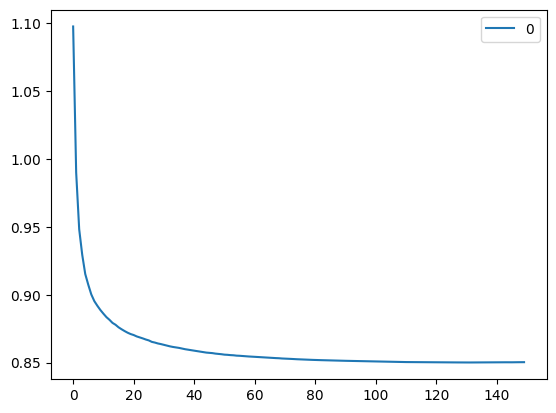

In [47]:
curve3 = pd.DataFrame(rmse_val)
curve3.plot()

### 결국에는 K값을 어떤 값으로 지정하는 게 가장 좋은 것인가?
- 그럼 KNN 모델을 통해서 단순하게 최소의 RMSE 나온 것이 가장 뛰어난 모델이라고 말할 수 있는가?
- KNN 이웃수 50개 이상으로 해서 최적의 모델을 도출했습니다!

In [49]:
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


- 두 가지 변수만 사용했지만- > 나머지 변수까지 사용하게 되면? 차원이 더 늘어나게 되는 것이고 -> 그럴 경우는 KNN값이 어떤 식으로 바뀌는지?

### 필수과제
- 위의 캘리포니아 데이터의 다른 변수들을 더 추가하여서 KNN 모델의 성능을 확인해 주시고
- 해당 변수들을 선택한 이유를 -> 논리적으로 정리하셔서, 시각화도 해주시고 -> RMSE 낮추는 K의 최적의 값을 찾아 주시고
- RMSE값을 공유해 주세요!

### 필수과제 2
- KNNImputer 
- 결측값에 대한 대체 방법
- 결측치 대체할 때 -> 거리기반으로 들어간다 na값들이 거리기반으로 대체가 된다.
- 개념 정리해주시고 -> 결측치 보간해서 실제 어떤 식으로 결측치가 대체 되는지 확인해 주세요!
- 캘리포니아데이터를 실제 na값을 최소 100 정도 만들어 주시고 그 값을 

- 1. 평균으로 대체 
- 2. 0으로 대체
- 3. KNN 대체

- 실제 RMSE 값이 어떤 식으로 바뀌는지를 KNN모델로 비교 정리해 주세요!

###  필수과제는 11월 첫 수업 진행하기 전까지만 제출하시면 됩니다.
###  복습과제는 당연히 다음 주까지 제출해야 합니다.